In [1]:
load('.RData')

In [2]:
library(ggplot2)
library(ropls)
library(caret)

Loading required package: lattice



In [3]:
head(df)

,MouseID,Genotype,Treatment,Behavior,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,⋯,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76,3415_1,c,m,CS,cCSm,0.6497813,0.8286964,0.4058618,2.921435,5.167979,⋯,0.2397524,0.1390524,0.1129261,0.1320008,0.1293628,0.4869115,0.1251522,0.1468649,0.1435166,1.627181
77,3415_2,c,m,CS,cCSm,0.6164807,0.8419742,0.3885837,2.862575,5.194163,⋯,0.2490305,0.1337874,0.1216068,0.1390077,0.1430844,0.4678333,0.1128567,0.1611316,0.1457194,1.562096
78,3415_3,c,m,CS,cCSm,0.6374243,0.8528818,0.4005615,2.968155,5.350820,⋯,0.2479560,0.1423236,0.1302614,0.1348037,0.1476734,0.4625013,0.1164328,0.1605935,0.1428788,1.571868
79,3415_4,c,m,CS,cCSm,0.5768145,0.7553900,0.3483463,2.624901,4.727509,⋯,0.2332252,0.1336368,0.1073210,0.1189823,0.1212896,0.4791095,0.1028311,0.1442380,0.1416812,1.646608
80,3415_5,c,m,CS,cCSm,0.5425448,0.7579173,0.3500507,2.634509,4.735602,⋯,0.2444693,0.1333582,0.1128511,0.1286353,0.1426175,0.4383545,0.1106140,0.1556674,0.1464082,1.607631
81,3415_6,c,m,CS,cCSm,0.5699176,0.7610777,0.3439100,2.598085,4.764640,⋯,0.2475161,0.1358669,0.1100969,0.1279185,0.1338177,0.4613140,0.1142573,0.1559240,0.1421386,1.506520


In [14]:
set.seed(99)
index <- createDataPartition(df$Behavior, p = 0.70, list = FALSE)
train_data <- df[index, c(4, 6:76)]
test_data <- df[-index, c(4, 6:76)]
sprintf("The trainining set contains %d rows", nrow(train_data))
sprintf("The test set contains %d rows", nrow(test_data))
table(train_data$Behavior)
# train_balanced <- upSample(x = train_data, y = train_data$class)
# train_balanced <- train_balanced[, !(colnames(train_balanced) %in% c("Class"))]
# table(train_balanced$class)

[1] "The trainining set contains 387 rows"

[1] "The test set contains 165 rows"


 CS  SC 
200 187 

PLS-DA
387 samples x 71 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total     0.55    0.896   0.892 0.162   3   0 0.01 0.01


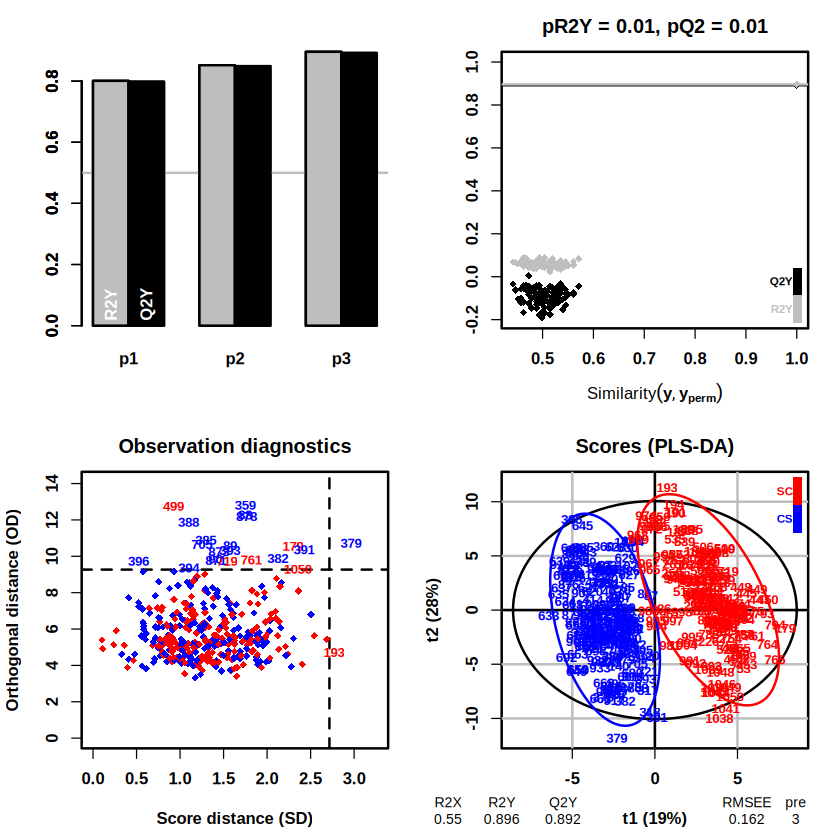

In [19]:
res.plsda <- opls(train_data[, 2:72], train_data$Behavior, 
                  algoC = 'nipals',
                  predI = 3,
                  permI = 100, 
                  scaleC = 'standard')

Warning message:
“OPLS: number of predictive components ('predI' argument) set to 1”


OPLS-DA
387 samples x 71 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.643    0.949   0.944 0.114   1   4 0.01 0.01


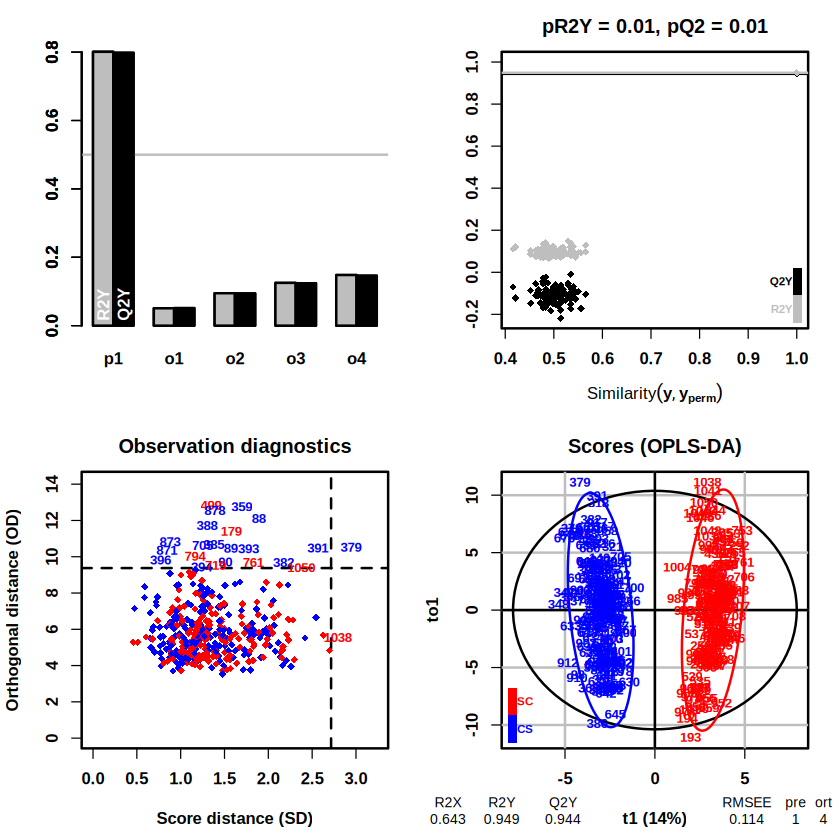

In [20]:
res.oplsda <- opls(train_data[, 2:72], 
                    train_data$Behavior, algoC = 'nipals', orthoI = NA, 
                    scaleC = 'standard', permI = 100)

In [21]:
############################
#######    S-PLOT ##########
############################
DataSplot <- function(datamatrix, opls) {

  s <- datamatrix
  T <- as.matrix(opls@scoreMN)

  p1 <- c()
  for (i in 1:ncol(s)) {
    scov <- cov(s[,i], T) 
    p1 <- matrix(c(p1, scov), ncol=1)
  }
  
    
  pcorr1 <- c()
  for (i in 1:nrow(p1)) {
    den <- apply(T, 2, sd)*sd(s[,i])
    corr1 <- p1[i,]/den
    pcorr1 <- matrix(c(pcorr1, corr1), ncol=1)
  }

  datasplot <- data.frame(Cov = p1, Corr = pcorr1)
  rownames(datasplot) <- colnames(datamatrix)

  return(datasplot)
}

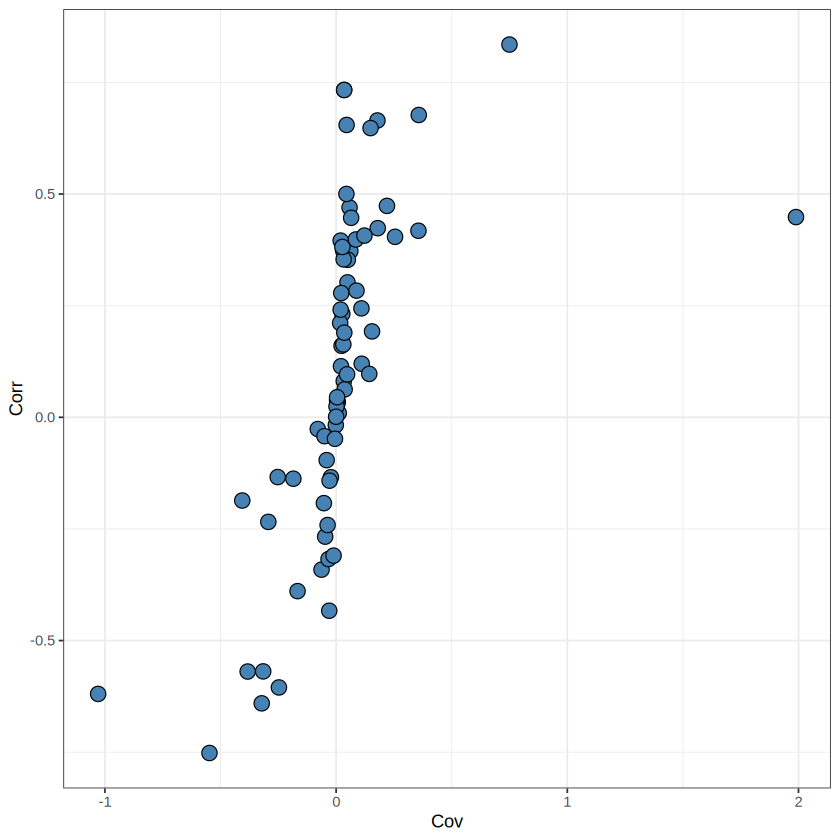

In [28]:
df_splot <- DataSplot(as.matrix(train_data[, 2:72]), res.oplsda)
ggplot(df_splot, aes(x = Cov , y = Corr)) +
    geom_point(shape = 21, color = 'black', fill = 'steelblue', size = 4) +
    theme_bw()


In [29]:
head(df_splot)

,Cov,Corr
,<dbl>,<dbl>
DYRK1A_N,-0.32180180,-0.640643961
ITSN1_N,-0.31553879,-0.569096580
BDNF_N,-0.02250138,-0.134210903
NR1_N,0.01138720,0.009396331
NR2A_N,-0.07941219,-0.026347658
pAKT_N,0.05809310,0.469801978


In [16]:
save.image()